In [10]:
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
import os
import keras
import cv2
import tensorflow as tf
# import keras.utils as utils
from keras import optimizers
from keras.models import Sequential
from keras import layers
from keras import models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Activation
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input,decode_predictions
from keras.layers import Input
from keras.applications import xception
from keras.preprocessing import image

from tensorflow.python.keras import optimizers, regularizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Activation, Flatten, Dropout
from tensorflow.keras.applications import Xception
from keras.applications.xception import preprocess_input
from tensorflow.python.keras.models import Model

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Model 1

## 64,64,1 without augmentation

### Data Preprocessing

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset_transport/train',
                                               class_mode='categorical',
                                              #  classes = ['airplane','automobile','ship', 'truck'],
                                                 target_size = (64, 64),
                                                shuffle=True,
                                                 batch_size = 256,
                                                 color_mode ='grayscale')

train_generator.class_indices

Found 8000 images belonging to 4 classes.


{'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}

In [ ]:
print(train_generator.filenames)
print(train_generator.image_shape)
print(train_generator.classes)

['airplane/0001.png', 'airplane/0002.png', 'airplane/0003.png', 'airplane/0004.png', 'airplane/0005.png', 'airplane/0006.png', 'airplane/0007.png', 'airplane/0008.png', 'airplane/0009.png', 'airplane/0010.png', 'airplane/0011.png', 'airplane/0012.png', 'airplane/0013.png', 'airplane/0014.png', 'airplane/0015.png', 'airplane/0016.png', 'airplane/0017.png', 'airplane/0018.png', 'airplane/0019.png', 'airplane/0020.png', 'airplane/0021.png', 'airplane/0022.png', 'airplane/0023.png', 'airplane/0024.png', 'airplane/0025.png', 'airplane/0026.png', 'airplane/0027.png', 'airplane/0028.png', 'airplane/0029.png', 'airplane/0030.png', 'airplane/0031.png', 'airplane/0032.png', 'airplane/0033.png', 'airplane/0034.png', 'airplane/0035.png', 'airplane/0036.png', 'airplane/0037.png', 'airplane/0038.png', 'airplane/0039.png', 'airplane/0040.png', 'airplane/0041.png', 'airplane/0042.png', 'airplane/0043.png', 'airplane/0044.png', 'airplane/0045.png', 'airplane/0046.png', 'airplane/0047.png', 'airplane/00

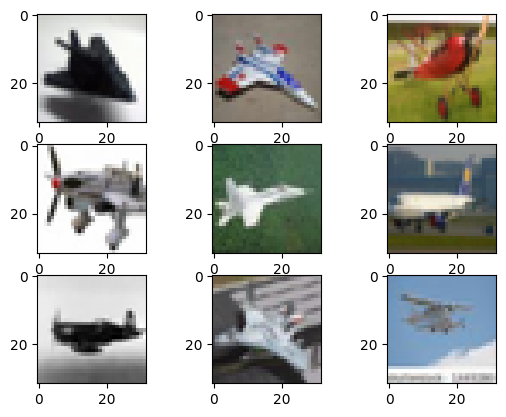

In [ ]:
train_dir= '/content/drive/MyDrive/dataset_transport/train'

for i in range(9):
    plt.subplot(330 + 1 + i)
    img = Image.open(train_dir+'//'+train_generator.filenames[i])
    plt.imshow(img)
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset_transport/test',
        class_mode='categorical',
        target_size=(64, 64),
        batch_size=256,
        shuffle=True,
        color_mode='grayscale')


validation_generator.class_indices

Found 2000 images belonging to 4 classes.


{'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}

In [ ]:
print(validation_generator.filenames)
print(validation_generator.image_shape)
print(validation_generator.classes)

['airplane/0001.png', 'airplane/0002.png', 'airplane/0003.png', 'airplane/0004.png', 'airplane/0005.png', 'airplane/0006.png', 'airplane/0007.png', 'airplane/0008.png', 'airplane/0009.png', 'airplane/0010.png', 'airplane/0011.png', 'airplane/0012.png', 'airplane/0013.png', 'airplane/0014.png', 'airplane/0015.png', 'airplane/0016.png', 'airplane/0017.png', 'airplane/0018.png', 'airplane/0019.png', 'airplane/0020.png', 'airplane/0021.png', 'airplane/0022.png', 'airplane/0023.png', 'airplane/0024.png', 'airplane/0025.png', 'airplane/0026.png', 'airplane/0027.png', 'airplane/0028.png', 'airplane/0029.png', 'airplane/0030.png', 'airplane/0031.png', 'airplane/0032.png', 'airplane/0033.png', 'airplane/0034.png', 'airplane/0035.png', 'airplane/0036.png', 'airplane/0037.png', 'airplane/0038.png', 'airplane/0039.png', 'airplane/0040.png', 'airplane/0041.png', 'airplane/0042.png', 'airplane/0043.png', 'airplane/0044.png', 'airplane/0045.png', 'airplane/0046.png', 'airplane/0047.png', 'airplane/00

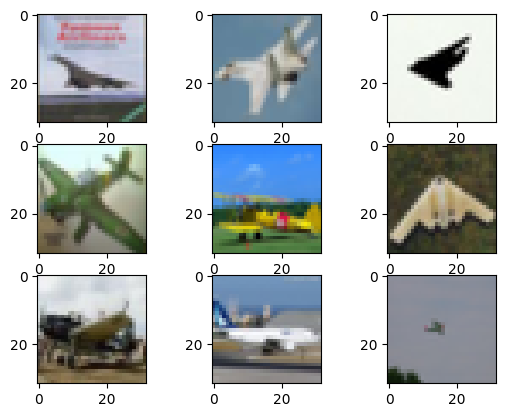

In [ ]:
test_dir= '/content/drive/MyDrive/dataset_transport/test'

for i in range(9):
    plt.subplot(330 + 1 + i)
    img = Image.open(test_dir+'//'+validation_generator.filenames[i])
    plt.imshow(img)
plt.show()

### Model Training

In [ ]:
#Build CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 6, 6, 128)        

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_generator,epochs=80,validation_data=validation_generator)

Epoch 1/80
32/32 [==============================] - 1754s 56s/step - loss: 1.2766 - accuracy: 0.4022 - val_loss: 1.1355 - val_accuracy: 0.4955
Epoch 2/80
32/32 [==============================] - 27s 840ms/step - loss: 1.0785 - accuracy: 0.5144 - val_loss: 1.0300 - val_accuracy: 0.5530
Epoch 3/80
32/32 [==============================] - 27s 846ms/step - loss: 0.9894 - accuracy: 0.5753 - val_loss: 0.9529 - val_accuracy: 0.6115
Epoch 4/80
32/32 [==============================] - 27s 851ms/step - loss: 0.8995 - accuracy: 0.6236 - val_loss: 0.8244 - val_accuracy: 0.6695
Epoch 5/80
32/32 [==============================] - 27s 846ms/step - loss: 0.8092 - accuracy: 0.6735 - val_loss: 0.7617 - val_accuracy: 0.7045
Epoch 6/80
32/32 [==============================] - 27s 838ms/step - loss: 0.7549 - accuracy: 0.7025 - val_loss: 0.7415 - val_accuracy: 0.7135
Epoch 7/80
32/32 [==============================] - 27s 845ms/step - loss: 0.7062 - accuracy: 0.7268 - val_loss: 0.6982 - val_accuracy: 0.7205

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

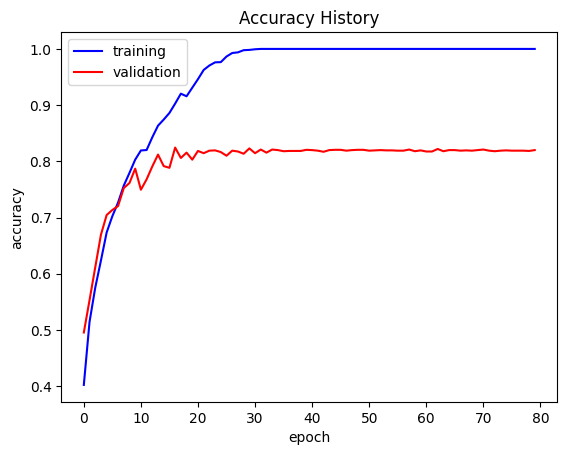

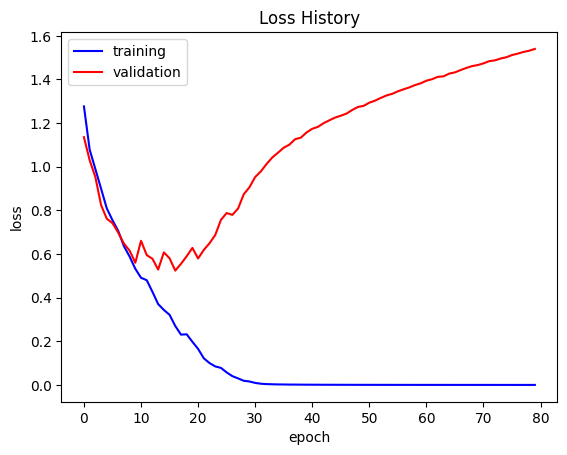

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, 'b', label='Training acc')
plt.plot(val_acc, 'r', label='Validation acc')
plt.title('Accuracy History')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'])
plt.show()

plt.plot(loss, 'b', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Loss History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'])
plt.show()

In [ ]:
model.save("CNN.h5", include_optimizer=True)

### Model Inference

using random online image to do prediction

#### This is part of data prep

In [ ]:
image = cv2.imread('/content/1157035.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
resized_img = gray_image.resize((64, 64))

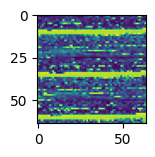

In [ ]:
plt.subplot(330 + 1)
    # img = Image.open(train_dir+'//'+train_generator.filenames[i])
plt.imshow(gray_image)
plt.show()

In [ ]:
img = np.array(gray_image)/255.0

#### This is the actual model inference

1/1 [==============================] - 0s 18ms/step
Prediction: 1


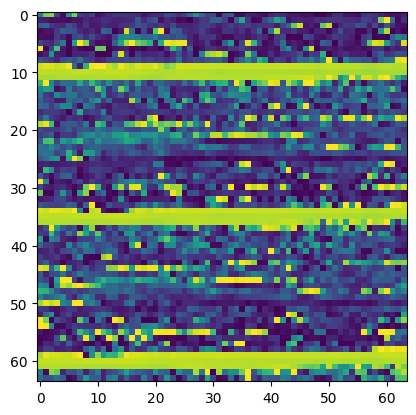

In [ ]:
result = model.predict(img[np.newaxis])     #inpt shape: [batch, height, width, channel]
predicted_class = np.argmax(result[0], axis=-1)  #decode one-hot

plt.imshow(img)
print("Prediction:", predicted_class)

In [ ]:
for i, layer in enumerate(model.layers):
    print(i,layer.name)

0 conv2d_12
1 max_pooling2d_12
2 conv2d_13
3 max_pooling2d_13
4 conv2d_14
5 max_pooling2d_14
6 conv2d_15
7 max_pooling2d_15
8 flatten_3
9 dense_6
10 dense_7


1/1 [==============================] - 0s 128ms/step


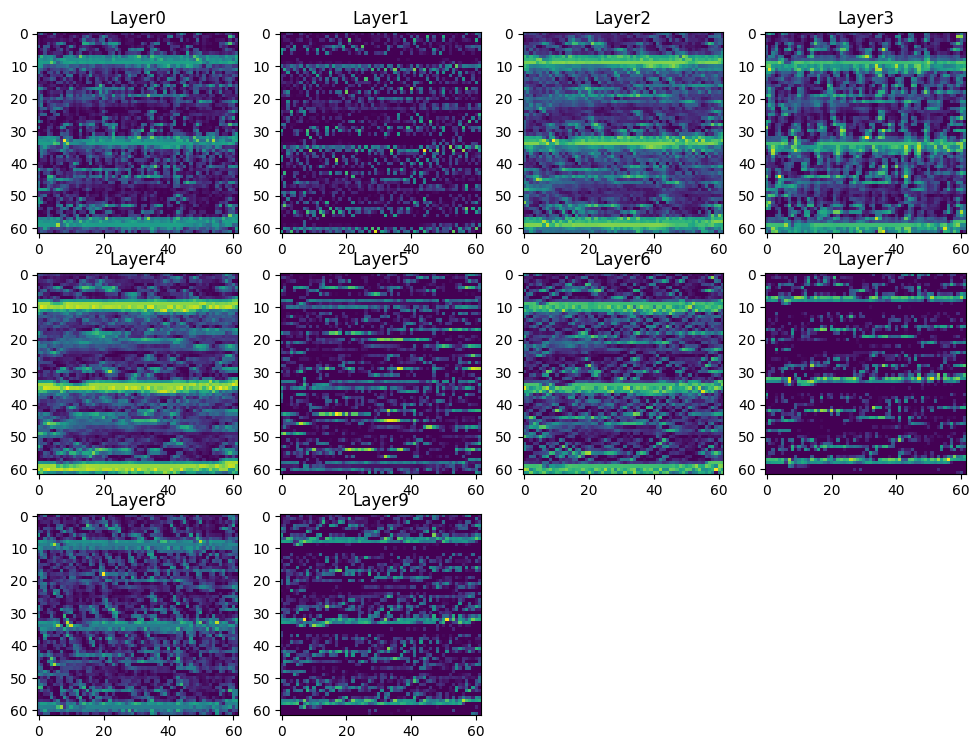

In [ ]:
layer_outputs = [layer.output for layer in model.layers[0:1]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activation = activation_model.predict(img[np.newaxis])

plt.figure(figsize=(12,12))
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.imshow(activation[0, :, :, i])
    plt.title('Layer' + str(i))
plt.show()

# Model 2

## 320,320,3 without augmentation

### Data Processing

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset_transport/train',
                                               class_mode='categorical',
                                              #  classes = ['airplane','automobile','ship', 'truck'],
                                                 target_size = (320, 320),
                                                shuffle=True,
                                                 batch_size = 128)

train_generator.class_indices

Found 8000 images belonging to 4 classes.


{'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset_transport/test',
        class_mode='categorical',
        target_size=(320,320),
        batch_size=128,
        shuffle=True)


train_generator.class_indices

Found 2000 images belonging to 4 classes.


{'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}

### Model Tranining

In [ ]:
#Build CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(320,320,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 318, 318, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 159, 159, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 157, 157, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 78, 78, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 76, 76, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 38, 38, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_generator,epochs=80,validation_data=validation_generator)

Epoch 1/80
63/63 [==============================] - 82s 1s/step - loss: 1.2477 - accuracy: 0.4475 - val_loss: 0.9098 - val_accuracy: 0.6345
Epoch 2/80
63/63 [==============================] - 67s 1s/step - loss: 0.8723 - accuracy: 0.6467 - val_loss: 0.8215 - val_accuracy: 0.6825
Epoch 3/80
63/63 [==============================] - 62s 981ms/step - loss: 0.7150 - accuracy: 0.7175 - val_loss: 0.6747 - val_accuracy: 0.7390
Epoch 4/80
63/63 [==============================] - 62s 980ms/step - loss: 0.6040 - accuracy: 0.7699 - val_loss: 0.6612 - val_accuracy: 0.7500
Epoch 5/80
63/63 [==============================] - 60s 944ms/step - loss: 0.4492 - accuracy: 0.8314 - val_loss: 0.6546 - val_accuracy: 0.7445
Epoch 6/80
63/63 [==============================] - 59s 935ms/step - loss: 0.3282 - accuracy: 0.8773 - val_loss: 0.6612 - val_accuracy: 0.7740
Epoch 7/80
63/63 [==============================] - 59s 931ms/step - loss: 0.1841 - accuracy: 0.9356 - val_loss: 0.7185 - val_accuracy: 0.7820
Epoch

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, 'b', label='Training acc')
plt.plot(val_acc, 'r', label='Validation acc')
plt.title('Accuracy History')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'])
plt.show()

plt.plot(loss, 'b', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Loss History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'])
plt.show()

I stopped training because it was definitely overfitting

# Model 3

## 32,32,3 without augmentation

### Data Processing

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset_transport/train',
                                               class_mode='categorical',
                                              #  classes = ['airplane','automobile','ship', 'truck'],
                                                 target_size = (32, 32),
                                                shuffle=True,
                                                 batch_size = 128)

train_generator.class_indices

Found 8000 images belonging to 4 classes.


{'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset_transport/test',
        class_mode='categorical',
        target_size=(32,32),
        batch_size=128,
        shuffle=True)

train_generator.class_indices

Found 2000 images belonging to 4 classes.


{'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}

### Model Tranining

In [ ]:
#Build CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_generator,epochs=15,validation_data=validation_generator)

Epoch 1/15
63/63 [==============================] - 1523s 24s/step - loss: 1.2069 - accuracy: 0.4487 - val_loss: 1.0132 - val_accuracy: 0.5605
Epoch 2/15
63/63 [==============================] - 48s 764ms/step - loss: 0.9356 - accuracy: 0.6014 - val_loss: 0.8565 - val_accuracy: 0.6715
Epoch 3/15
63/63 [==============================] - 47s 748ms/step - loss: 0.7989 - accuracy: 0.6823 - val_loss: 0.7831 - val_accuracy: 0.7000
Epoch 4/15
63/63 [==============================] - 50s 787ms/step - loss: 0.7137 - accuracy: 0.7135 - val_loss: 0.6960 - val_accuracy: 0.7410
Epoch 5/15
63/63 [==============================] - 48s 765ms/step - loss: 0.6227 - accuracy: 0.7670 - val_loss: 0.6812 - val_accuracy: 0.7390
Epoch 6/15
63/63 [==============================] - 49s 775ms/step - loss: 0.5611 - accuracy: 0.7866 - val_loss: 0.5738 - val_accuracy: 0.7865
Epoch 7/15
63/63 [==============================] - 49s 773ms/step - loss: 0.5018 - accuracy: 0.8062 - val_loss: 0.5513 - val_accuracy: 0.7895

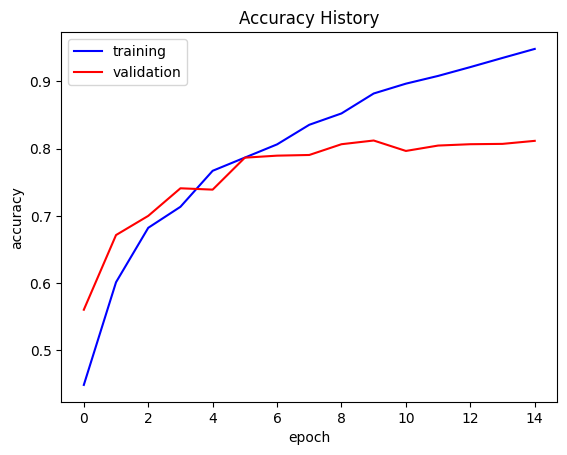

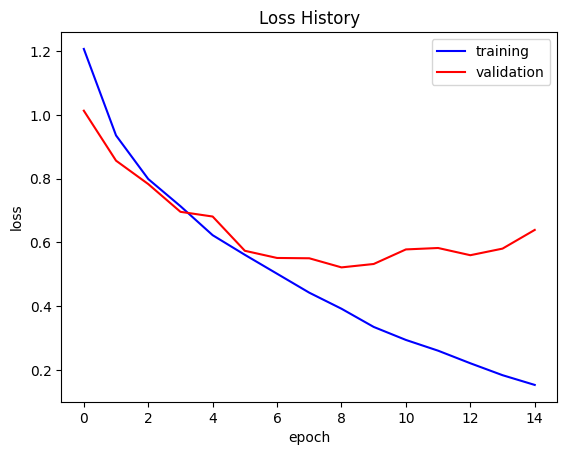

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, 'b', label='Training acc')
plt.plot(val_acc, 'r', label='Validation acc')
plt.title('Accuracy History')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'])
plt.show()

plt.plot(loss, 'b', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Loss History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'])
plt.show()

# Model 4

## 32,32,1 with augmentation

### Data Processing

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=20,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.1)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset_transport/train',
                                               class_mode='categorical',
                                                 target_size = (32, 32),
                                                shuffle=True,
                                                 batch_size = 128,
                                                 color_mode ='grayscale')

train_generator.class_indices

Found 8000 images belonging to 4 classes.


{'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}

In [ ]:
print(train_generator.filenames)
print(train_generator.image_shape)
print(train_generator.classes)

['airplane/0001.png', 'airplane/0002.png', 'airplane/0003.png', 'airplane/0004.png', 'airplane/0005.png', 'airplane/0006.png', 'airplane/0007.png', 'airplane/0008.png', 'airplane/0009.png', 'airplane/0010.png', 'airplane/0011.png', 'airplane/0012.png', 'airplane/0013.png', 'airplane/0014.png', 'airplane/0015.png', 'airplane/0016.png', 'airplane/0017.png', 'airplane/0018.png', 'airplane/0019.png', 'airplane/0020.png', 'airplane/0021.png', 'airplane/0022.png', 'airplane/0023.png', 'airplane/0024.png', 'airplane/0025.png', 'airplane/0026.png', 'airplane/0027.png', 'airplane/0028.png', 'airplane/0029.png', 'airplane/0030.png', 'airplane/0031.png', 'airplane/0032.png', 'airplane/0033.png', 'airplane/0034.png', 'airplane/0035.png', 'airplane/0036.png', 'airplane/0037.png', 'airplane/0038.png', 'airplane/0039.png', 'airplane/0040.png', 'airplane/0041.png', 'airplane/0042.png', 'airplane/0043.png', 'airplane/0044.png', 'airplane/0045.png', 'airplane/0046.png', 'airplane/0047.png', 'airplane/00

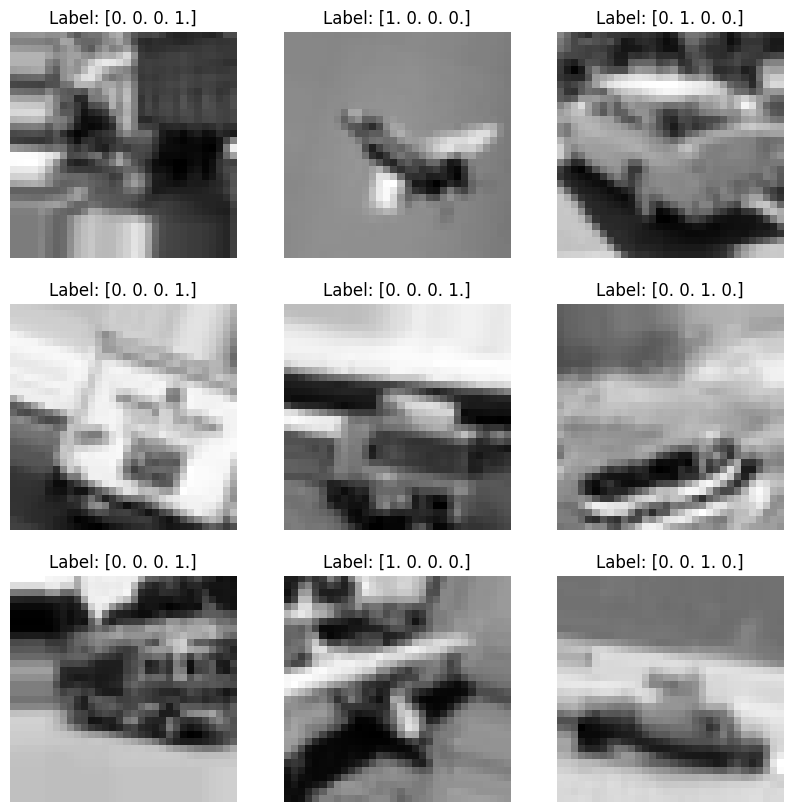

In [ ]:
batch_images, batch_labels = train_generator.next()

# Display the first 9 images from the batch
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(batch_images[i], cmap='gray')
    plt.title(f"Label: {batch_labels[i]}")
    plt.axis('off')
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset_transport/test',
        class_mode='categorical',
        target_size=(32, 32),
        batch_size=256,
        shuffle=True,
        color_mode='grayscale')

validation_generator.class_indices

Found 2000 images belonging to 4 classes.


{'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}

In [ ]:
print(validation_generator.filenames)
print(validation_generator.image_shape)
print(validation_generator.classes)

['airplane/0001.png', 'airplane/0002.png', 'airplane/0003.png', 'airplane/0004.png', 'airplane/0005.png', 'airplane/0006.png', 'airplane/0007.png', 'airplane/0008.png', 'airplane/0009.png', 'airplane/0010.png', 'airplane/0011.png', 'airplane/0012.png', 'airplane/0013.png', 'airplane/0014.png', 'airplane/0015.png', 'airplane/0016.png', 'airplane/0017.png', 'airplane/0018.png', 'airplane/0019.png', 'airplane/0020.png', 'airplane/0021.png', 'airplane/0022.png', 'airplane/0023.png', 'airplane/0024.png', 'airplane/0025.png', 'airplane/0026.png', 'airplane/0027.png', 'airplane/0028.png', 'airplane/0029.png', 'airplane/0030.png', 'airplane/0031.png', 'airplane/0032.png', 'airplane/0033.png', 'airplane/0034.png', 'airplane/0035.png', 'airplane/0036.png', 'airplane/0037.png', 'airplane/0038.png', 'airplane/0039.png', 'airplane/0040.png', 'airplane/0041.png', 'airplane/0042.png', 'airplane/0043.png', 'airplane/0044.png', 'airplane/0045.png', 'airplane/0046.png', 'airplane/0047.png', 'airplane/00

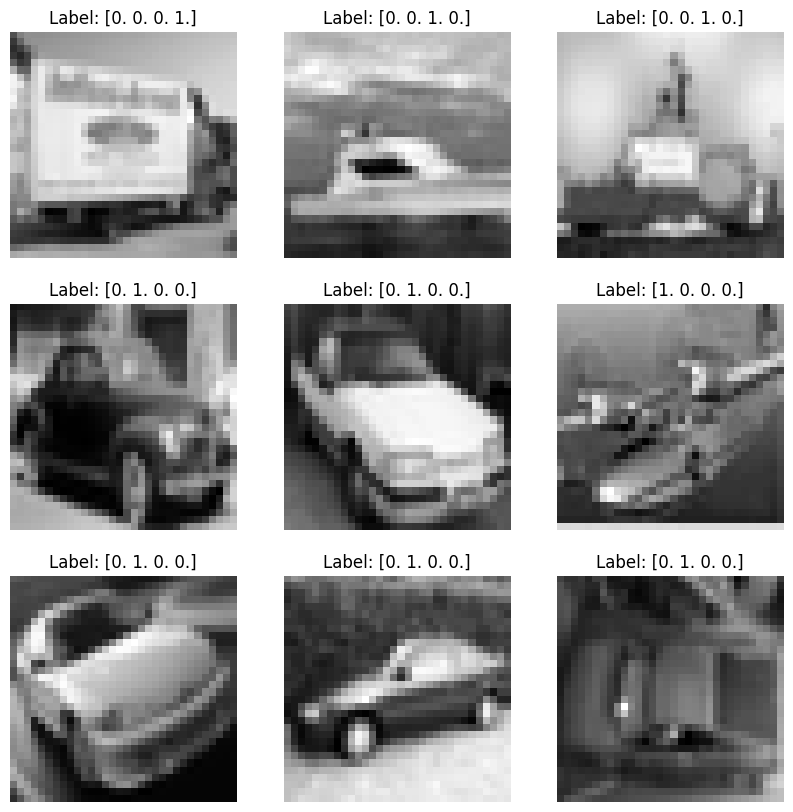

In [ ]:
batch_images, batch_labels = validation_generator.next()

# Display the first 9 images from the batch
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(batch_images[i], cmap='gray')
    plt.title(f"Label: {batch_labels[i]}")
    plt.axis('off')
plt.show()

### Model Training

In [ ]:
#Build CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_generator,epochs=60,validation_data=validation_generator)

Epoch 1/60
63/63 [==============================] - 55s 848ms/step - loss: 1.2073 - accuracy: 0.4509 - val_loss: 1.0973 - val_accuracy: 0.5315
Epoch 2/60
63/63 [==============================] - 54s 852ms/step - loss: 1.1010 - accuracy: 0.5049 - val_loss: 0.9924 - val_accuracy: 0.5675
Epoch 3/60
63/63 [==============================] - 53s 834ms/step - loss: 1.0307 - accuracy: 0.5484 - val_loss: 0.9738 - val_accuracy: 0.5790
Epoch 4/60
63/63 [==============================] - 53s 841ms/step - loss: 0.9730 - accuracy: 0.5819 - val_loss: 0.8120 - val_accuracy: 0.6785
Epoch 5/60
63/63 [==============================] - 53s 849ms/step - loss: 0.9336 - accuracy: 0.6047 - val_loss: 0.9043 - val_accuracy: 0.6715
Epoch 6/60
63/63 [==============================] - 50s 787ms/step - loss: 0.8918 - accuracy: 0.6270 - val_loss: 0.7865 - val_accuracy: 0.6950
Epoch 7/60
63/63 [==============================] - 53s 841ms/step - loss: 0.8499 - accuracy: 0.6514 - val_loss: 0.9251 - val_accuracy: 0.6180

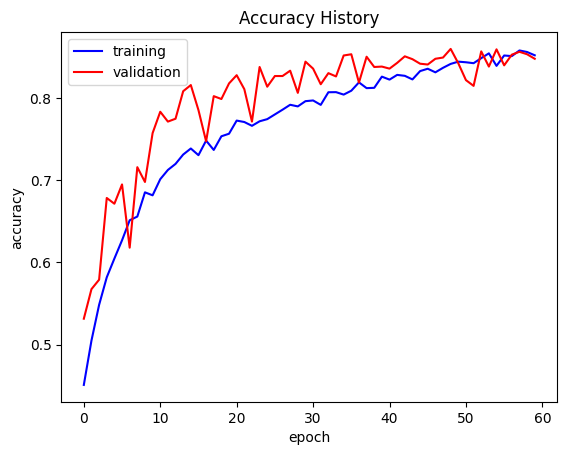

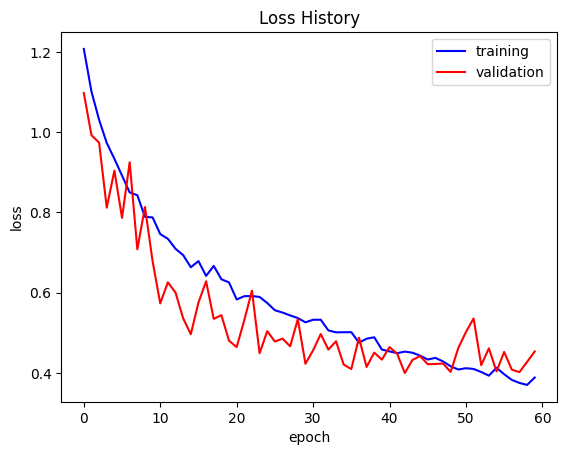

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, 'b', label='Training acc')
plt.plot(val_acc, 'r', label='Validation acc')
plt.title('Accuracy History')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'])
plt.show()

plt.plot(loss, 'b', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Loss History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'])
plt.show()

# Model 5

## 32,32,1 with augmentation and dropout


### Data Processing

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=20,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.1)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset_transport/train',
                                               class_mode='categorical',
                                                 target_size = (32, 32),
                                                shuffle=True,
                                                 batch_size = 128,
                                                 color_mode ='grayscale')

train_generator.class_indices

Found 8000 images belonging to 4 classes.


{'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}

In [6]:
print(train_generator.filenames)
print(train_generator.image_shape)
print(train_generator.classes)

['airplane/0001.png', 'airplane/0002.png', 'airplane/0003.png', 'airplane/0004.png', 'airplane/0005.png', 'airplane/0006.png', 'airplane/0007.png', 'airplane/0008.png', 'airplane/0009.png', 'airplane/0010.png', 'airplane/0011.png', 'airplane/0012.png', 'airplane/0013.png', 'airplane/0014.png', 'airplane/0015.png', 'airplane/0016.png', 'airplane/0017.png', 'airplane/0018.png', 'airplane/0019.png', 'airplane/0020.png', 'airplane/0021.png', 'airplane/0022.png', 'airplane/0023.png', 'airplane/0024.png', 'airplane/0025.png', 'airplane/0026.png', 'airplane/0027.png', 'airplane/0028.png', 'airplane/0029.png', 'airplane/0030.png', 'airplane/0031.png', 'airplane/0032.png', 'airplane/0033.png', 'airplane/0034.png', 'airplane/0035.png', 'airplane/0036.png', 'airplane/0037.png', 'airplane/0038.png', 'airplane/0039.png', 'airplane/0040.png', 'airplane/0041.png', 'airplane/0042.png', 'airplane/0043.png', 'airplane/0044.png', 'airplane/0045.png', 'airplane/0046.png', 'airplane/0047.png', 'airplane/00

In [ ]:
# batch_images, batch_labels = train_generator.next()

# # Display the first 9 images from the batch
# plt.figure(figsize=(10, 10))
# for i in range(9):
#     plt.subplot(3, 3, i+1)
#     plt.imshow(batch_images[i], cmap='rgb')
#     plt.title(f"Label: {batch_labels[i]}")
#     plt.axis('off')
# plt.show()

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset_transport/test',
        class_mode='categorical',
        target_size=(32, 32),
        batch_size=128,
        shuffle=True,
        color_mode='grayscale')

validation_generator.class_indices

Found 2000 images belonging to 4 classes.


{'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}

In [8]:
print(validation_generator.filenames)
print(validation_generator.image_shape)
print(validation_generator.classes)

['airplane/0001.png', 'airplane/0002.png', 'airplane/0003.png', 'airplane/0004.png', 'airplane/0005.png', 'airplane/0006.png', 'airplane/0007.png', 'airplane/0008.png', 'airplane/0009.png', 'airplane/0010.png', 'airplane/0011.png', 'airplane/0012.png', 'airplane/0013.png', 'airplane/0014.png', 'airplane/0015.png', 'airplane/0016.png', 'airplane/0017.png', 'airplane/0018.png', 'airplane/0019.png', 'airplane/0020.png', 'airplane/0021.png', 'airplane/0022.png', 'airplane/0023.png', 'airplane/0024.png', 'airplane/0025.png', 'airplane/0026.png', 'airplane/0027.png', 'airplane/0028.png', 'airplane/0029.png', 'airplane/0030.png', 'airplane/0031.png', 'airplane/0032.png', 'airplane/0033.png', 'airplane/0034.png', 'airplane/0035.png', 'airplane/0036.png', 'airplane/0037.png', 'airplane/0038.png', 'airplane/0039.png', 'airplane/0040.png', 'airplane/0041.png', 'airplane/0042.png', 'airplane/0043.png', 'airplane/0044.png', 'airplane/0045.png', 'airplane/0046.png', 'airplane/0047.png', 'airplane/00

In [ ]:
# batch_images, batch_labels = validation_generator.next()

# # Display the first 9 images from the batch
# plt.figure(figsize=(10, 10))
# for i in range(9):
#     plt.subplot(3, 3, i+1)
#     plt.imshow(batch_images[i], cmap='gray')
#     plt.title(f"Label: {batch_labels[i]}")
#     plt.axis('off')
# plt.show()

### Model Tranining

In [18]:
#Build CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 2, 2, 128)        

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_generator,epochs=100,validation_data=validation_generator)

Epoch 1/100
63/63 [==============================] - 25s 377ms/step - loss: 1.3031 - accuracy: 0.3738 - val_loss: 1.1627 - val_accuracy: 0.4865
Epoch 2/100
63/63 [==============================] - 23s 371ms/step - loss: 1.1762 - accuracy: 0.4676 - val_loss: 1.0577 - val_accuracy: 0.5390
Epoch 3/100
63/63 [==============================] - 23s 365ms/step - loss: 1.1019 - accuracy: 0.5046 - val_loss: 0.9835 - val_accuracy: 0.5945
Epoch 4/100
63/63 [==============================] - 23s 365ms/step - loss: 1.0320 - accuracy: 0.5497 - val_loss: 0.9045 - val_accuracy: 0.6080
Epoch 5/100
63/63 [==============================] - 23s 374ms/step - loss: 0.9879 - accuracy: 0.5732 - val_loss: 0.8969 - val_accuracy: 0.6585
Epoch 6/100
63/63 [==============================] - 23s 370ms/step - loss: 0.9482 - accuracy: 0.5995 - val_loss: 0.8072 - val_accuracy: 0.6965
Epoch 7/100
63/63 [==============================] - 23s 372ms/step - loss: 0.9151 - accuracy: 0.6139 - val_loss: 0.7818 - val_accuracy:

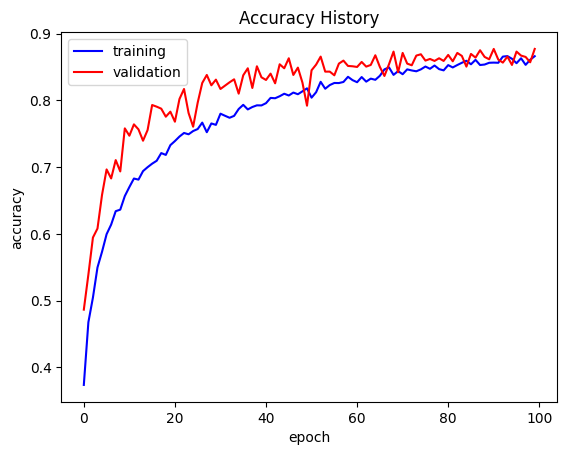

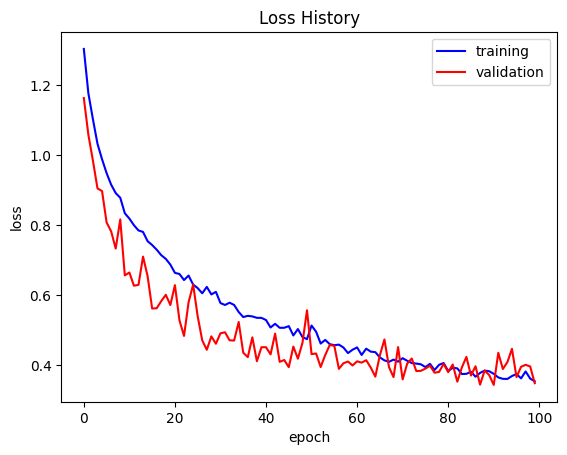

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, 'b', label='Training acc')
plt.plot(val_acc, 'r', label='Validation acc')
plt.title('Accuracy History')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'])
plt.show()

plt.plot(loss, 'b', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Loss History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'])
plt.show()

# Model 6

## 32,32,1 with augmentation and dropout and l2

### Model Tranining

In [6]:
#Build CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_generator,epochs=100,validation_data=validation_generator)

Epoch 1/100
63/63 [==============================] - 2279s 36s/step - loss: 1.3762 - accuracy: 0.3709 - val_loss: 1.1701 - val_accuracy: 0.4900
Epoch 2/100
63/63 [==============================] - 24s 377ms/step - loss: 1.2057 - accuracy: 0.4735 - val_loss: 1.0948 - val_accuracy: 0.5160
Epoch 3/100
63/63 [==============================] - 23s 373ms/step - loss: 1.1408 - accuracy: 0.5044 - val_loss: 1.0484 - val_accuracy: 0.5845
Epoch 4/100
63/63 [==============================] - 23s 372ms/step - loss: 1.0969 - accuracy: 0.5341 - val_loss: 1.0984 - val_accuracy: 0.5775
Epoch 5/100
63/63 [==============================] - 23s 368ms/step - loss: 1.0611 - accuracy: 0.5616 - val_loss: 0.8891 - val_accuracy: 0.6400
Epoch 6/100
63/63 [==============================] - 23s 368ms/step - loss: 1.0296 - accuracy: 0.5734 - val_loss: 0.8822 - val_accuracy: 0.6520
Epoch 7/100
63/63 [==============================] - 23s 371ms/step - loss: 0.9971 - accuracy: 0.5995 - val_loss: 0.8478 - val_accuracy:

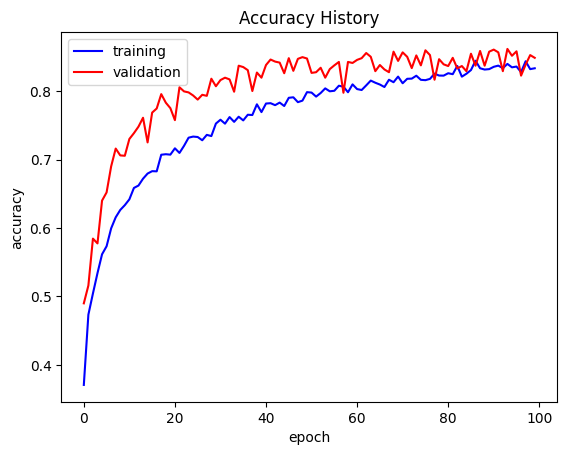

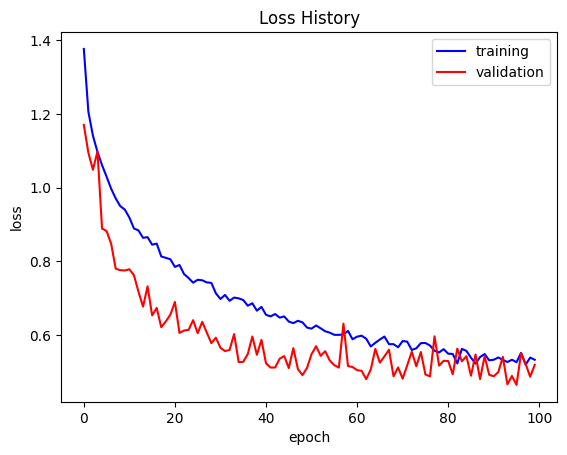

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, 'b', label='Training acc')
plt.plot(val_acc, 'r', label='Validation acc')
plt.title('Accuracy History')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'])
plt.show()

plt.plot(loss, 'b', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Loss History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'])
plt.show()

the accuracy is not increasing might be due to regularization strength might be too high. Can try to tune it down however due to computational resources I will not be doing that.

# CNN Summary

Utilizes grayscale images and small kernel sizes for dataset noise and small image size. Max pooling help emphasize the most significant features while suppressing the effects of noise. Tuned hyperameters(batch size, image size and channels) and observed 32x32, 64x64 image size are the least overfitting. 32x32 image size is chosen to avoid upscaling noise. Overfitting is mitigated using data augmentation (rotation, shear range, height shift, width shift), dropout, and L2 regularization. BatchNormalization and Dropout layers impact training accuracy but are inactive during validation hence better validation loss calculations. Adam optimizer is employed for adaptive learning rates and overcoming local minimum. Evaluation involves accuracy and loss plots over epochs for optimal training epochs. Architecture comprises three Conv2D layers; ReLU activation, followed by MaxPooling2D, and Flatten layer. Dense layers of 512 units with ReLU activation and a softmax output layer with 4 units complete the model. Total trainable parameters are 357,380.

# Transfer learning

# Model 7

# VGG16

feature extraction

### Data Processing

In [25]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=20,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.1)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset_transport/train',
                                               class_mode='categorical',
                                                 target_size = (64, 64),
                                                shuffle=True,
                                                 batch_size = 128,
                                                 color_mode ='rgb')

train_generator.class_indices

Found 8000 images belonging to 4 classes.


{'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}

In [26]:
test_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset_transport/test',
        class_mode='categorical',
        target_size=(64, 64),
        batch_size=128,
        shuffle=True,
        color_mode='rgb')

validation_generator.class_indices

Found 2000 images belonging to 4 classes.


{'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}

### Model Training

In [27]:


# Specify the intended image size we want
image_size = (64, 64, 3)
base_model = VGG16(weights='imagenet',include_top=False, input_shape=image_size)
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [28]:
base_model.trainable = False

In [8]:
#redefine classification layers
inputs = base_model.output

x = keras.layers.GlobalAveragePooling2D()(inputs)
x = keras.layers.Dropout(rate=0.5)(x)
x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
preds = keras.layers.Dense(4, activation="softmax")(x)

model=Model(inputs=base_model.input, outputs=preds)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_generator,epochs=100,validation_data=validation_generator)

Epoch 1/100
63/63 [==============================] - 34s 489ms/step - loss: 1.2042 - accuracy: 0.4757 - val_loss: 0.8421 - val_accuracy: 0.6825
Epoch 2/100
63/63 [==============================] - 30s 482ms/step - loss: 1.0040 - accuracy: 0.5750 - val_loss: 0.8324 - val_accuracy: 0.6705
Epoch 3/100
63/63 [==============================] - 30s 484ms/step - loss: 0.9485 - accuracy: 0.5934 - val_loss: 0.8178 - val_accuracy: 0.6890
Epoch 4/100
63/63 [==============================] - 31s 494ms/step - loss: 0.9205 - accuracy: 0.6120 - val_loss: 0.7643 - val_accuracy: 0.7160
Epoch 5/100
63/63 [==============================] - 30s 475ms/step - loss: 0.9120 - accuracy: 0.6170 - val_loss: 0.7548 - val_accuracy: 0.7245
Epoch 6/100
63/63 [==============================] - 30s 481ms/step - loss: 0.8909 - accuracy: 0.6296 - val_loss: 0.7450 - val_accuracy: 0.7345
Epoch 7/100
63/63 [==============================] - 30s 480ms/step - loss: 0.8907 - accuracy: 0.6309 - val_loss: 0.7604 - val_accuracy:

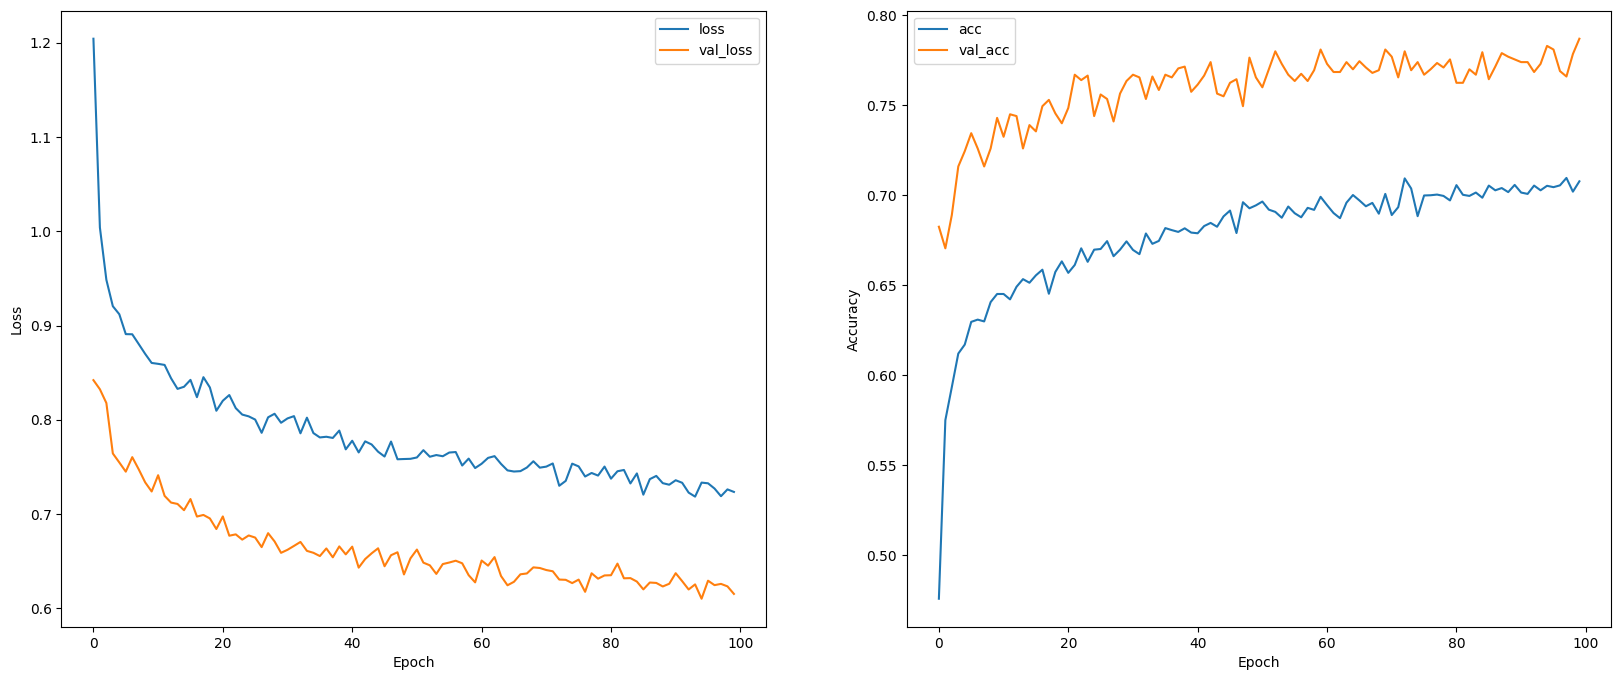

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Model 8

### Data Processing

In [29]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=20,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.1)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset_transport/train',
                                               class_mode='categorical',
                                                 target_size = (64, 64),
                                                shuffle=True,
                                                 batch_size = 128,
                                                 color_mode ='rgb')

train_generator.class_indices

Found 8000 images belonging to 4 classes.


{'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}

In [30]:
test_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset_transport/test',
        class_mode='categorical',
        target_size=(64, 64),
        batch_size=128,
        shuffle=True,
        color_mode='rgb')

validation_generator.class_indices

Found 2000 images belonging to 4 classes.


{'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}

### Model Training

In [31]:
# Specify the intended image size we want
image_size = (64, 64, 3)
base_model = VGG16(weights='imagenet',include_top=False, input_shape=image_size)
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [32]:
base_model.trainable = False

In [33]:
#redefine classification layers
inputs = base_model.output

x = keras.layers.GlobalAveragePooling2D()(inputs)
x = keras.layers.Dropout(rate=0.5)(x)
x = keras.layers.Dense(1024, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
preds = keras.layers.Dense(4, activation="softmax")(x)

model=Model(inputs=base_model.input, outputs=preds)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [35]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_generator,epochs=30,validation_data=validation_generator)

Epoch 1/30
63/63 [==============================] - 31s 483ms/step - loss: 0.7762 - accuracy: 0.6816 - val_loss: 0.6472 - val_accuracy: 0.7710
Epoch 2/30
63/63 [==============================] - 31s 489ms/step - loss: 0.7740 - accuracy: 0.6876 - val_loss: 0.6397 - val_accuracy: 0.7685
Epoch 3/30
63/63 [==============================] - 30s 469ms/step - loss: 0.7749 - accuracy: 0.6855 - val_loss: 0.6520 - val_accuracy: 0.7615
Epoch 4/30
63/63 [==============================] - 31s 489ms/step - loss: 0.7706 - accuracy: 0.6845 - val_loss: 0.6553 - val_accuracy: 0.7720
Epoch 5/30
63/63 [==============================] - 29s 468ms/step - loss: 0.7743 - accuracy: 0.6802 - val_loss: 0.6558 - val_accuracy: 0.7670
Epoch 6/30
63/63 [==============================] - 30s 481ms/step - loss: 0.7643 - accuracy: 0.6954 - val_loss: 0.6722 - val_accuracy: 0.7485
Epoch 7/30
63/63 [==============================] - 30s 480ms/step - loss: 0.7606 - accuracy: 0.7001 - val_loss: 0.6453 - val_accuracy: 0.7700

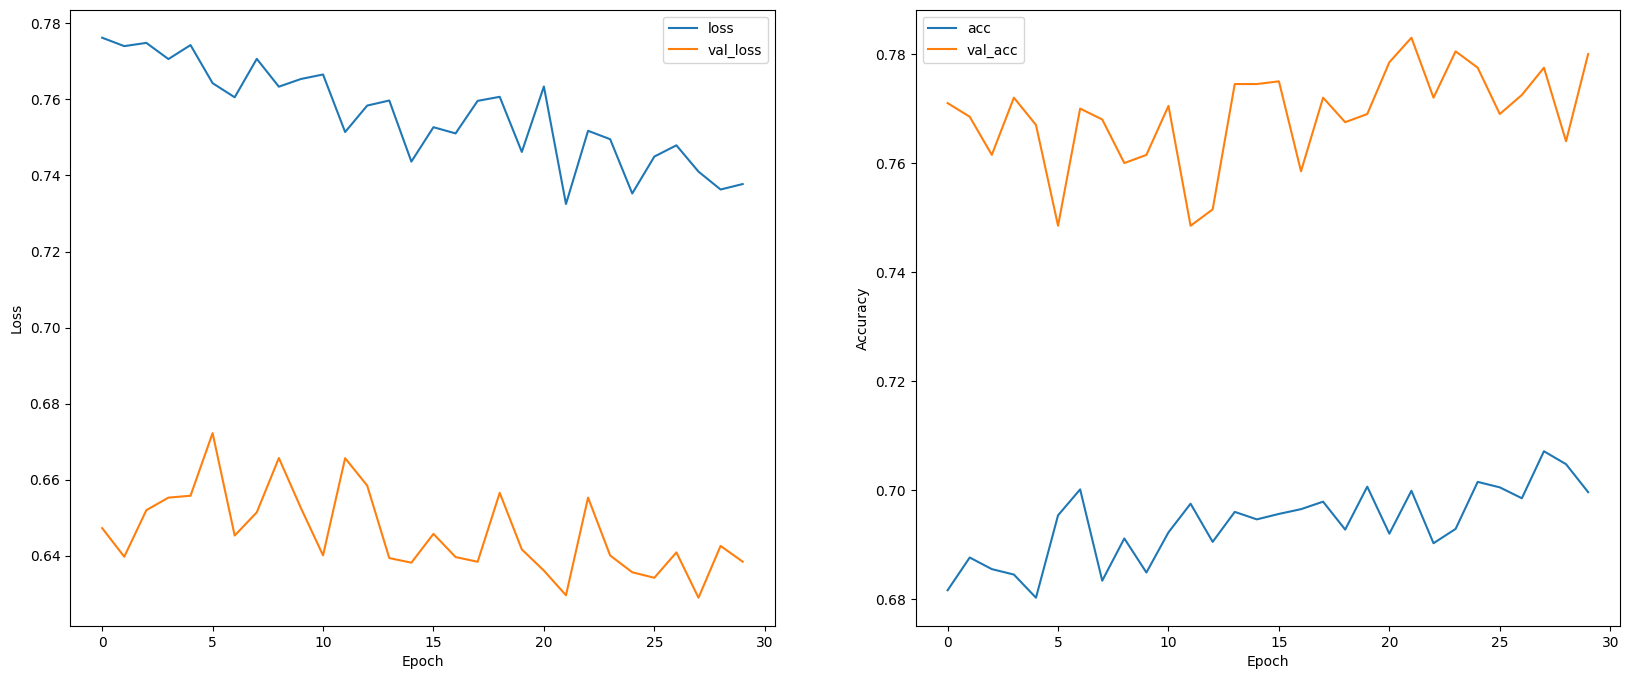

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

 VGG16 feature extraction performance is not ideal even after tunning the number of layers.

# Model 9

### Model Training

In [37]:
base_model.trainable = True

# Set all layers in the base model to non-trainable initially
for layer in base_model.layers:
    layer.trainable = False

# Set the last 10 layers to trainable
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Check the trainable status of each layer
for layer in base_model.layers:
    print(layer.name, layer.trainable)

input_6 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [38]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
len(model.trainable_variables)

18

In [40]:
history = model.fit(train_generator,epochs=30,validation_data=validation_generator)

Epoch 1/30
63/63 [==============================] - 34s 485ms/step - loss: 14.4801 - accuracy: 0.2606 - val_loss: 1.3878 - val_accuracy: 0.2500
Epoch 2/30
63/63 [==============================] - 30s 471ms/step - loss: 1.3890 - accuracy: 0.2656 - val_loss: 1.3831 - val_accuracy: 0.2655
Epoch 3/30
63/63 [==============================] - 30s 480ms/step - loss: 1.4143 - accuracy: 0.2895 - val_loss: 1.3732 - val_accuracy: 0.2510
Epoch 4/30
63/63 [==============================] - 31s 493ms/step - loss: 1.5701 - accuracy: 0.2842 - val_loss: 1.3823 - val_accuracy: 0.2500
Epoch 5/30
63/63 [==============================] - 31s 487ms/step - loss: 1.3957 - accuracy: 0.2592 - val_loss: 1.3859 - val_accuracy: 0.2500
Epoch 6/30
63/63 [==============================] - 32s 502ms/step - loss: 1.3859 - accuracy: 0.2614 - val_loss: 1.3851 - val_accuracy: 0.3275
Epoch 7/30
63/63 [==============================] - 30s 469ms/step - loss: 1.3787 - accuracy: 0.2758 - val_loss: 1.3850 - val_accuracy: 0.250

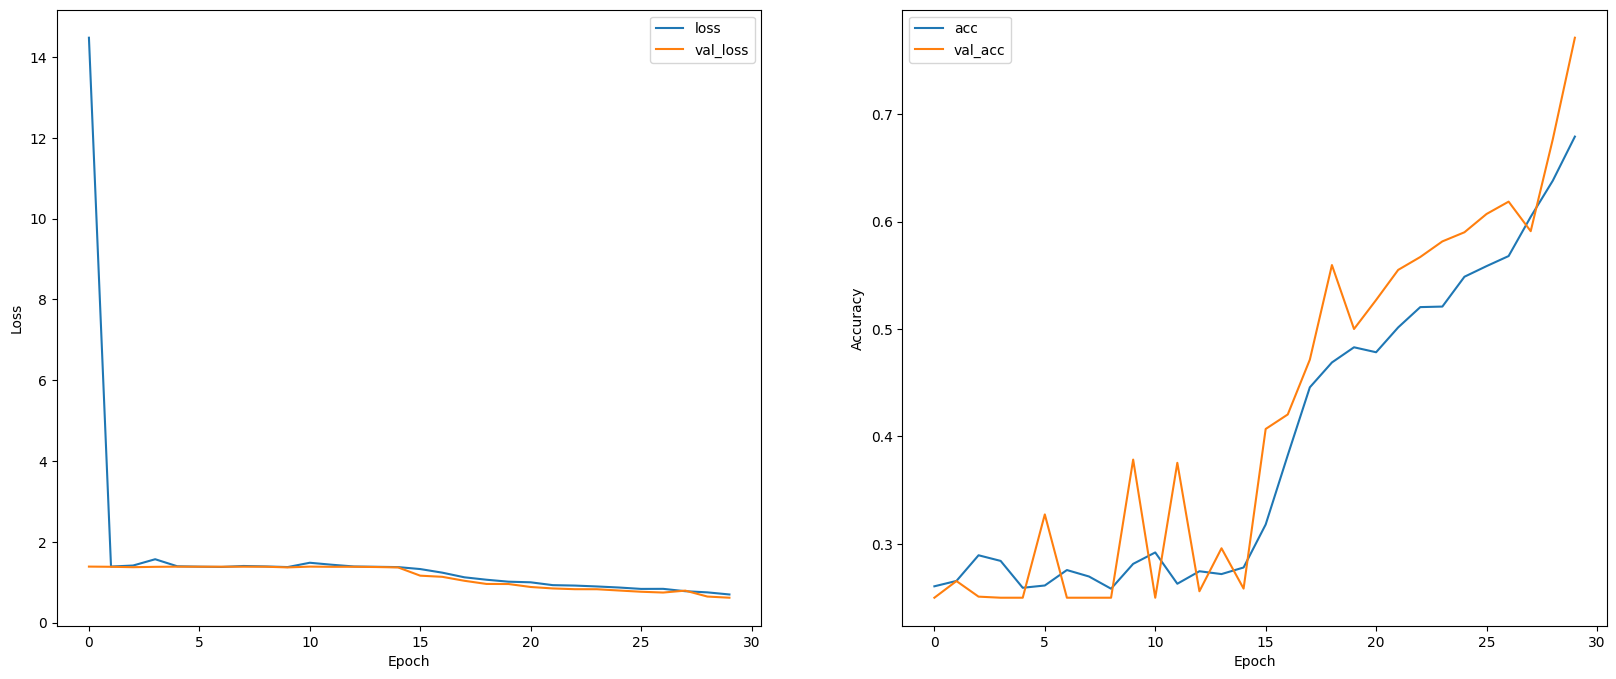

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

VGG16 fine tunning not ideal and suggest that it needs more epochs.

# Xception

Trained on ImageNet dataset which is the same as VGG16. The dataset contains the classes we want to classify.

feature extraction

### Data Processing

In [13]:
input_tensor = Input(shape=(71,71,3)) #minimun input shape for xception is 71

base_model = xception.Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(71, 71, 3),
                          pooling='avg')

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=20,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.1)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset_transport/train',
                                               class_mode='categorical',
                                                 target_size = (71, 71),
                                                shuffle=True,
                                                 batch_size = 128,
                                                 color_mode ='rgb')

train_generator.class_indices

Found 8000 images belonging to 4 classes.


{'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}

In [15]:
test_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset_transport/test',
        class_mode='categorical',
        target_size=(71, 71),
        batch_size=128,
        shuffle=True,
        color_mode='rgb')

validation_generator.class_indices

Found 2000 images belonging to 4 classes.


{'airplane': 0, 'automobile': 1, 'ship': 2, 'truck': 3}

### Model Tranining

In [7]:
inputs = base_model.output

x = keras.layers.Dense(1024, activation="relu")(inputs)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.Dropout(0.2)(x)
preds = keras.layers.Dense(4, activation="softmax")(x)

model=Model(inputs=base_model.input, outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 71, 71, 3)]          0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 35, 35, 32)           864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 35, 35, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 35, 35, 32)           0         ['block1_conv1_bn[0][0]'] 

In [ ]:
len(model.trainable_variables)

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_generator,epochs=30,validation_data=validation_generator)

Epoch 1/30
63/63 [==============================] - 63s 558ms/step - loss: 0.7383 - accuracy: 0.7004 - val_loss: 4.1637 - val_accuracy: 0.6830
Epoch 2/30
63/63 [==============================] - 34s 543ms/step - loss: 0.2850 - accuracy: 0.9034 - val_loss: 10.7199 - val_accuracy: 0.6320
Epoch 3/30
63/63 [==============================] - 34s 540ms/step - loss: 0.2229 - accuracy: 0.9279 - val_loss: 0.3654 - val_accuracy: 0.9275
Epoch 4/30
63/63 [==============================] - 35s 553ms/step - loss: 0.1693 - accuracy: 0.9430 - val_loss: 0.3255 - val_accuracy: 0.9355
Epoch 5/30
63/63 [==============================] - 34s 537ms/step - loss: 0.1407 - accuracy: 0.9526 - val_loss: 0.6285 - val_accuracy: 0.9335
Epoch 6/30
63/63 [==============================] - 35s 553ms/step - loss: 0.1360 - accuracy: 0.9564 - val_loss: 1.0612 - val_accuracy: 0.8290
Epoch 7/30
63/63 [==============================] - 34s 542ms/step - loss: 0.1206 - accuracy: 0.9629 - val_loss: 0.6196 - val_accuracy: 0.892

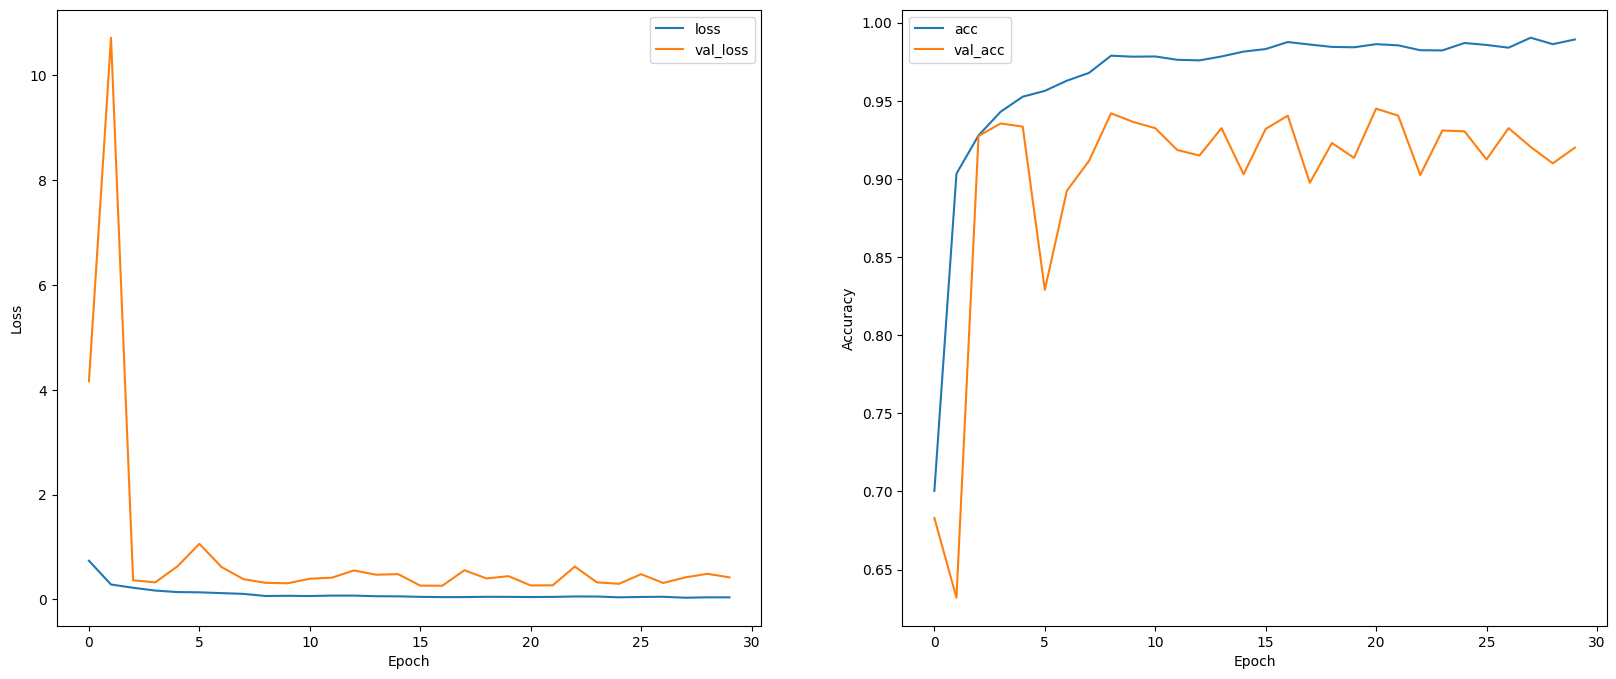

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

From the above results Xception is clearly better than VGG16

fine tunning

# Model 10

### Model Training

In [18]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  133


In [19]:
# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 71, 71, 3)]          0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 35, 35, 32)           864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 35, 35, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 35, 35, 32)           0         ['block1_conv1_bn[0][0]'] 

In [22]:
len(model.trainable_variables)

160

In [23]:
history = model.fit(train_generator,epochs=30,validation_data=validation_generator)

Epoch 1/30
63/63 [==============================] - 55s 532ms/step - loss: 0.0702 - accuracy: 0.9812 - val_loss: 0.4739 - val_accuracy: 0.9420
Epoch 2/30
63/63 [==============================] - 33s 531ms/step - loss: 0.0462 - accuracy: 0.9849 - val_loss: 0.8412 - val_accuracy: 0.9105
Epoch 3/30
63/63 [==============================] - 33s 526ms/step - loss: 0.0418 - accuracy: 0.9881 - val_loss: 0.5248 - val_accuracy: 0.9275
Epoch 4/30
63/63 [==============================] - 34s 543ms/step - loss: 0.0515 - accuracy: 0.9846 - val_loss: 0.9319 - val_accuracy: 0.9145
Epoch 5/30
63/63 [==============================] - 32s 514ms/step - loss: 0.0442 - accuracy: 0.9866 - val_loss: 0.4606 - val_accuracy: 0.9230
Epoch 6/30
63/63 [==============================] - 32s 514ms/step - loss: 0.0496 - accuracy: 0.9861 - val_loss: 0.5568 - val_accuracy: 0.9255
Epoch 7/30
63/63 [==============================] - 34s 534ms/step - loss: 0.0525 - accuracy: 0.9860 - val_loss: 0.4157 - val_accuracy: 0.9085

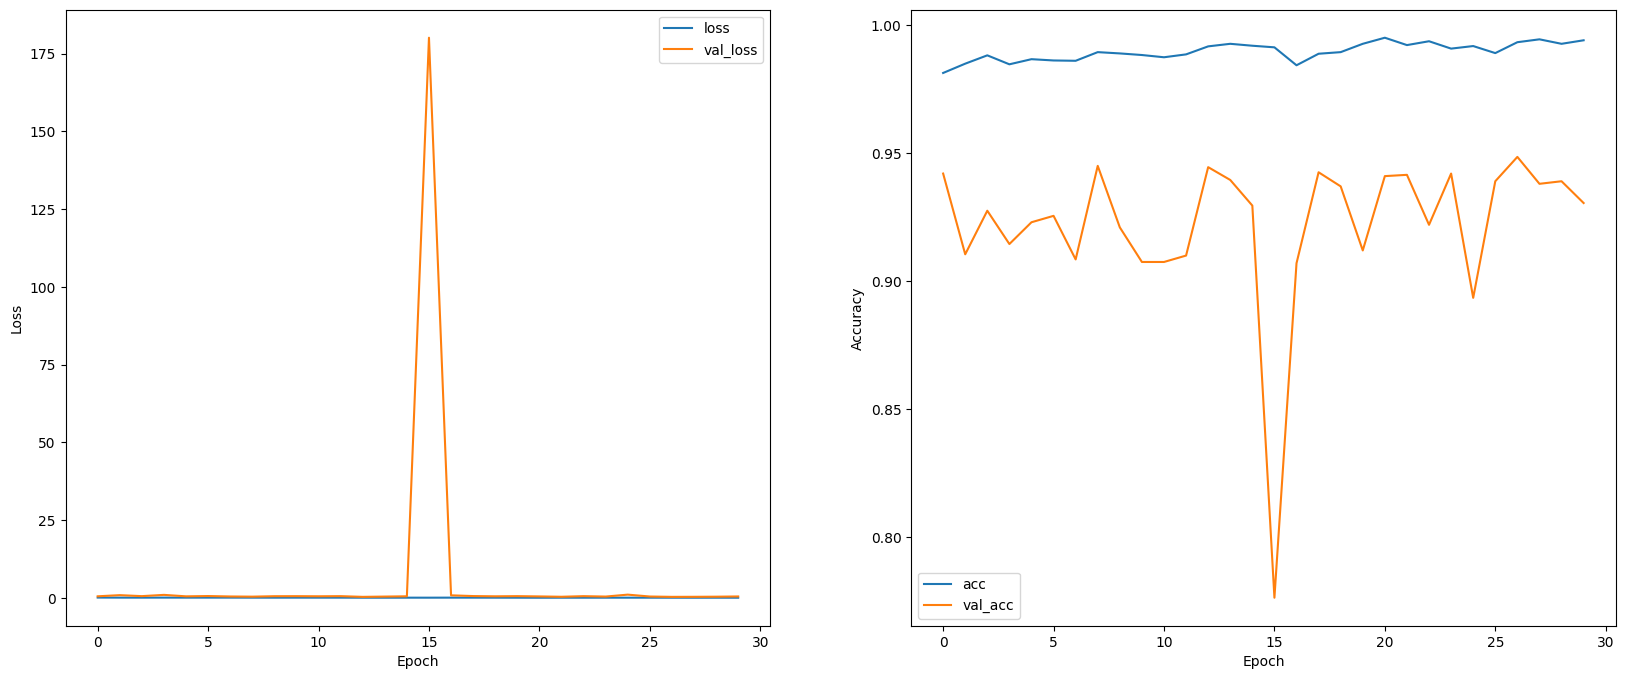

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

After fine tunning the performance remained the same. This maybe due to the feature extraction model already learned most of the features. Hence, there is nothing much to learn anymore.

# Transfer Learning Summary

Model Selection

*   VGG16(64,64,3): not ideal performance
*   Xception(71,71,3): ideal performance

*   Both models is selected due to they are trained on the same dataset which contained transport classes.

Feature Extraction

*   2 Dense Layers with 1024 for VGG16 and 1024,512 neurons for Xception since the both base models are trained on 1000 classes.

Fine Tunning

*   VGG16: unfroze the last 10 layers
*   Xception: Unfroze the last 33 layers

Overfitting techniques

*   2 Dropout(0.5) for VGG16 and 1 Dropout(0.5) and 1 Dropout(0.2) for Xception
*   Data Augmentation(rotation, shear range, height shift, width shift) for both models

Evaluation

*   Evaluation involves accuracy and loss plots over epochs for optimal training epochs.
*   Adam optimizer is employed for adaptive learning rates and overcoming local minimum.



# Comparison

Performance

*   Transfer learning better; trained on more data and better and more complex architecture.

CNN

*   Pros: simple, control over architecture, train to domain specific tasks
*   Cons: High data requirements, not the best performance, heavily dependent on data, overfitting risk, longer training time.

Transfer Learning

*   Pros: More trained data, robust, better performance, reduced training time, Lower data requirements, Reduced overfitting risk
*   Cons: Reliant on trained dataset, Difficult finding specific models for use case, limited control over model.

Decision

*   Xception better; computational resource, transfer learning is better. Less data requirements, faster training time, less overfitting risk from above cells, graphs

Views

*   For company's computational resource transfer learning better, less data requirements, faster training time, less overfitting risk from above cells, graphs
*   Evidence: https://www.v7labs.com/blog/transfer-learning-guide#:~:text=Traditional%20machine%20learning%20models%20require,using%20a%20small%20data%20set.

Problem

* Small image size, noise, and small dataset for CNN, overfitting for both methods without data augmentation and dropouts